In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import geopandas as gp
from simpledbf import Dbf5
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

PyTables is not installed. No support for HDF output.


In [ ]:
def contains(geom):
    return geom.within(boise_ccd.loc[0].geometry)

In [2]:
boise_ccd = gp.read_file("boise_ccd.shp")
boise_ccd = boise_ccd.to_crs({'datum': 'NAD83',
 'k': 1.00011328,
 'lat_0': 41.66666666666666,
 'lon_0': -115.75,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'us-ft',
 'x_0': 800143.9663999998,
 'y_0': 0})

In [3]:
df = gp.read_file("parcelspublic/parcelspublic.shp")

In [4]:
dbf = Dbf5('parcelCharacteristics/resichar.dbf')
df2 = dbf.to_dataframe()
df2["NOOFDWELLI"] = df2["NOOFDWELLI"].apply(lambda x: int(x))

In [5]:
dbf = Dbf5('parcelCharacteristics/commchar.dbf')
df3 = dbf.to_dataframe()
df3["UNITS"] = df3["UNITS"].apply(lambda x: int(x))

In [58]:
parcels = pd.concat([
         df2[df2["NOOFDWELLI"]>1][df2["NOOFDWELLI"]<=10] [["PARCEL","NOOFDWELLI"]].rename(
             index=str, columns={"NOOFDWELLI": "UNITS"}), 
         df3[df3["UNITS"]>1][df3["UNITS"]<=10][["PARCEL","UNITS"]]
    ])

new = df.merge(parcels, on='PARCEL')
new = new[~new['ADDRESS'].isnull()]
new = new[new["ACRES"]<=1]
new = new.loc[new["geometry"].apply(contains)]

C:\Users\Art Perkitny\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Art Perkitny\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [61]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

new = new.to_crs(epsg=3857)

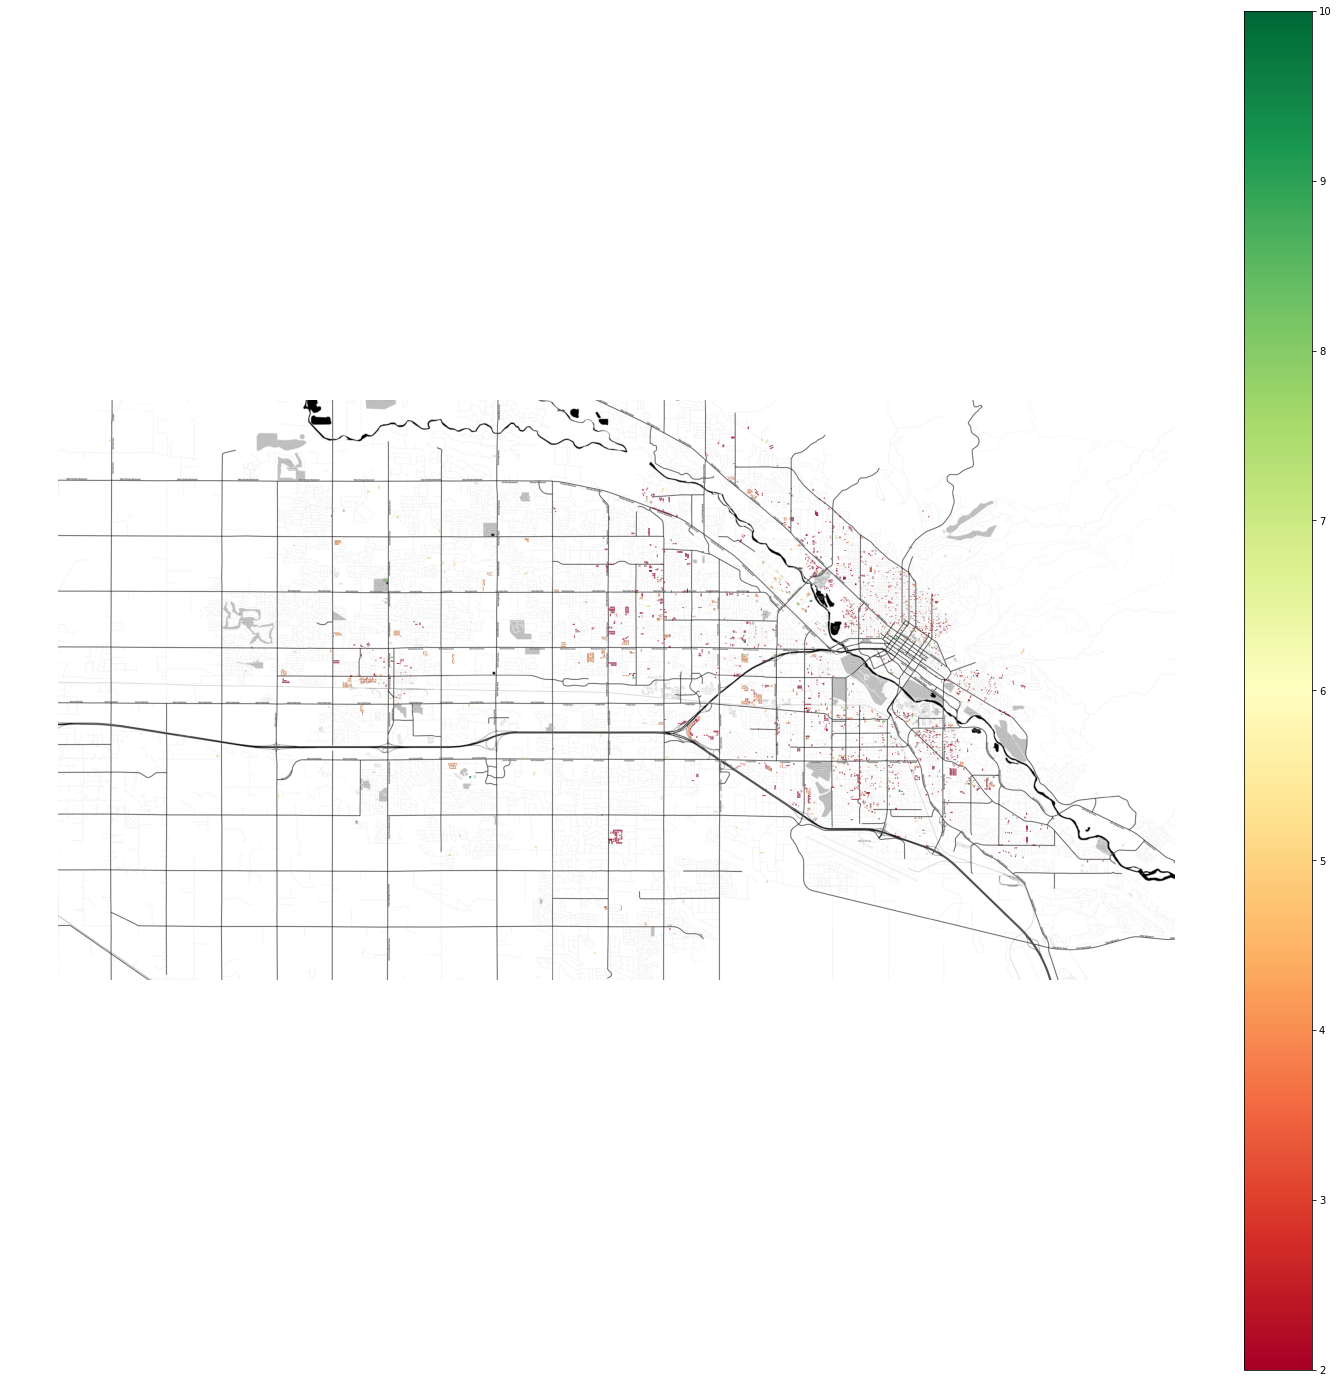

In [68]:
ax = new.plot(
    column='UNITS',
    cmap='RdYlGn',
    legend=True,
    figsize=(25, 25),
    alpha=0.7,
    edgecolor='black',
    linewidth=0.05,
)
add_basemap(ax, zoom=15, url=ctx.sources.ST_TONER)
ax.set_axis_off()
plt.savefig('boise2.svg')


In [69]:
new.to_csv("boise_multis.csv")

In [71]:
new.count()

PARCEL        4114
PROPYEAR      4114
PROPCODE      4114
ADDRESS       4114
PROPADDNUM    4096
PROPPREDIR    4114
PROPSTNM      4114
PROPSTTYPE    4114
PROPPOST         0
PROPUNIT       151
PROPUNUM       152
CITY_STATE    4114
LEGAL1        4114
LEGAL2        4113
LEGAL3        1793
LEGAL4         639
LEGAL5         193
ZONING        4114
BANKCODE         0
CODEAREA      4114
TOTALVALUE    4114
HOMEEXEMPT    4114
ACRES         4114
SECTION       4114
SUBNM         4114
geometry      4114
UNITS         4114
dtype: int64